In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Airlines+Data.xlsx',index_col=0)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [4]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

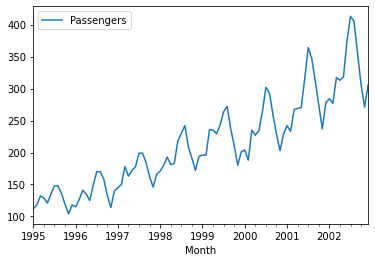

In [5]:
df.plot()

In [6]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

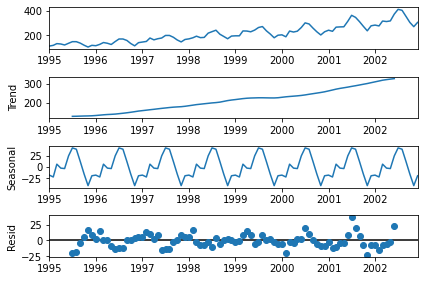

In [7]:
seasonal_decompose(df,model='additive').plot();

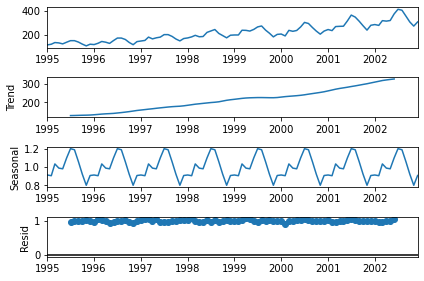

In [8]:
seasonal_decompose(df,model='multiplicative').plot();

In [9]:
df.shape

(96, 1)

In [10]:
train=df.head(84)
test=df.tail(12)

In [12]:
train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [14]:
test.head()

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [17]:
hwmodel=ExponentialSmoothing(train.Passengers,trend='add', seasonal='mul').fit()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [24]:
test_pred=hwmodel.forecast(12)
test_pred

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2002-01-01    281.191640
2002-02-01    278.383564
2002-03-01    322.559341
2002-04-01    312.455696
2002-05-01    311.023434
2002-06-01    348.874252
2002-07-01    389.545710
2002-08-01    384.750512
2002-09-01    341.857629
2002-10-01    300.735340
2002-11-01    262.167516
2002-12-01    299.371361
Freq: MS, dtype: float64

In [25]:
test

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355


<AxesSubplot:xlabel='Month'>

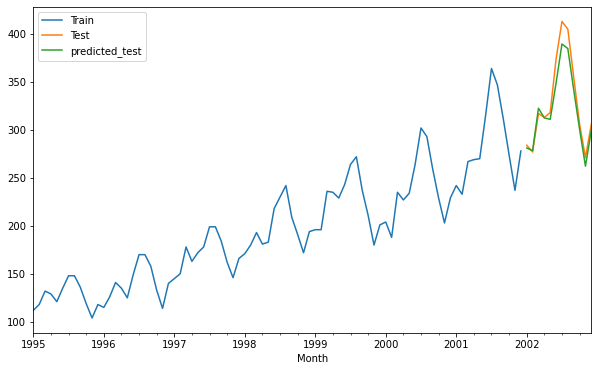

In [26]:
train['Passengers'].plot(legend=True, label='Train', figsize=(10,6))
test['Passengers'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,test_pred))

12.921284284293778

In [29]:
#final model considering full data sets
final_model=ExponentialSmoothing(df.Passengers,trend='add', seasonal='mul').fit()
pred=final_model.forecast(12)
pred

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2003-01-01    312.899164
2003-02-01    308.170903
2003-03-01    355.533272
2003-04-01    345.770384
2003-05-01    345.697110
2003-06-01    392.472018
2003-07-01    436.501550
2003-08-01    429.860620
2003-09-01    380.172862
2003-10-01    332.318642
2003-11-01    290.626602
2003-12-01    330.591802
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

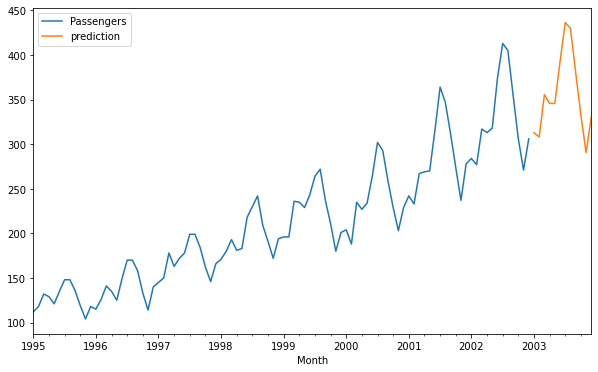

In [30]:
df['Passengers'].plot(legend=True, label='Passengers', figsize=(10,6))
pred.plot(legend=True, label='prediction')